In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import cv2
import os
import sys
#suppress warnings for cleanliness
import warnings
warnings.filterwarnings('ignore')

In [5]:

dir='att_faces'
Skip = ''
path = os.getcwd()+'/'+dir+'/'
alpha = []
for i in range (1, 41):
    s = "s" + str(i)
    alpha.append(s)

targets = []
pictures = []
for p,letter in enumerate(alpha):
    dirs = os.listdir( path+letter+'/' )
    for item in dirs:
        if item == '.DS_STORE':
            continue
        if item[0:2] == Skip:
            continue
        local_path =path+letter+'/'+item
        img = cv2.imread(local_path,0)
        pictures.append(img)
        targets.append(letter)
print("Sample size = ", len(pictures))
pictures = np.asarray(pictures)


Sample size =  400


(400, 112, 92)
[1.00592412e+10 7.08602042e+08 3.09303182e+08 2.80379020e+08
 1.99316591e+08 1.75122075e+08 1.39042515e+08 1.11570537e+08
 1.04778951e+08 9.11310324e+07 7.58409400e+07 6.35401620e+07
 5.67420810e+07 4.97071596e+07 4.66783795e+07 4.51549809e+07
 4.35039523e+07 4.03113766e+07 3.82753652e+07 3.47055697e+07
 3.31109098e+07 3.10242995e+07 3.03739344e+07 2.86216683e+07
 2.73723123e+07 2.59424775e+07 2.55302262e+07 2.33136711e+07
 2.38047659e+07 2.25849434e+07 2.19130411e+07 2.13842685e+07
 2.05497603e+07 1.97458356e+07 1.88412049e+07 1.79655435e+07
 1.72980599e+07 1.69011542e+07 1.64194314e+07 1.58927814e+07
 1.55098073e+07 1.50108718e+07 1.43960063e+07 1.42992959e+07
 1.38644500e+07 1.32596164e+07 1.29861964e+07 1.25836547e+07
 1.23919027e+07 1.22478294e+07 1.18964500e+07 1.17051088e+07
 1.13307936e+07 1.12321966e+07 1.09962640e+07 1.03805710e+07
 1.02733304e+07 1.00438723e+07 9.76972131e+06 9.73205222e+06
 9.47870286e+06 9.29324463e+06 9.03930441e+06 8.82220637e+06
 8.582672

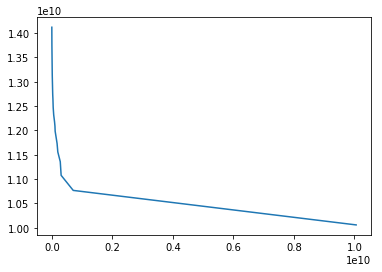

In [21]:
from sklearn.model_selection import train_test_split
#stack
print(pictures.shape)
A = np.zeros((400, 112*92))
counter = 0
for img in pictures:
    flatt = img.ravel()
    for i in range(len(flatt)):
        A[counter][i] = flatt[i]
    counter = counter +1
X_train, X_test, y_train, y_test = train_test_split(A, targets, test_size=0.25, random_state=42)
#subtract mean from each row
u = []
A = A.T
for i in range(X_train.shape[1]):
    colmean = np.mean(X_train,axis=1)
    X_train[:,i] = X_train[:,i]  - colmean
    u.append(colmean)
#eignvalues
w, v= np.linalg.eig(np.matmul(X_train, X_train.T))
print(w, v)
summed = []
cum = 0
for i in w:
    cum = cum + i
    summed.append(cum)
plt.plot(w, summed)
#plot the eigvenvalues vs cum sum for highest variance
#plt.plot(w, sum(w[,;5]))

#values to threshold
    

In [25]:
#we will take the top 10% of eigenvalues it looks like
len(w) * .1

30.0

In [62]:
m = .9
e = []
for i in range(int(m*len(w))):
    e.append(v[i])
r = []

#build atoms
for img in X_train:
    r.append(np.matmul(np.asarray(img)[0:int(m*len(w))].T, np.asarray(e)))

#PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=int(m*len(w)), svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape(int(m*len(w)), pictures[0].shape[0], pictures[0].shape[1])
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_pca, y_train)

predictions = neigh.predict(x_test_pca)
print(classification_report(y_test, predictions))


#my pca
#reconstruct testing
X_test_pca = []
for img in X_test:
    X_test_pca.append(np.matmul(np.asarray(img)[0:int(m*len(w))].T, np.asarray(e)))

#reconstruct training
X_train_pca = []
for img in r:
    X_train_pca.append(img ** np.asarray(e))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(r, y_train) 

predictions = neigh.predict(X_test_pca)
print(classification_report(y_test, predictions))






    

              precision    recall  f1-score   support

          s1       0.00      0.00      0.00         4
         s10       1.00      0.33      0.50         3
         s11       1.00      0.33      0.50         3
         s12       0.00      0.00      0.00         4
         s13       1.00      0.50      0.67         2
         s14       1.00      1.00      1.00         1
         s15       0.00      0.00      0.00         3
         s16       1.00      0.50      0.67         2
         s18       0.00      0.00      0.00         3
         s19       0.15      1.00      0.27         2
          s2       0.00      0.00      0.00         2
         s20       0.00      0.00      0.00         1
         s21       0.00      0.00      0.00         2
         s22       0.00      0.00      0.00         1
         s23       1.00      0.25      0.40         4
         s24       0.00      0.00      0.00         4
         s25       0.00      0.00      0.00         2
         s26       0.00    

# Analysis
When higher thresholds were used, the resulting classification scores went up. In the below, you can see the reconstructed images of the faces. Above, you can see the accuracy score with thresholding of 90%, this went up from the accuracy of 10% thresholding which was nearly half. The optimal thresholding seems to be 90% in terms of classification accuracy, but, the gains are marginal.

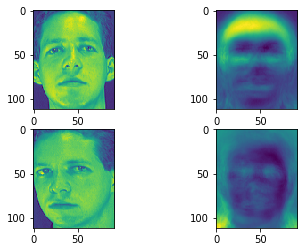

In [61]:
#example test image and what we found
plt.subplot(221)
plt.imshow(pictures[0])
plt.subplot(222)
plt.imshow(eigenfaces[0])
plt.subplot(223)
plt.imshow(pictures[1])
plt.subplot(224)
plt.imshow(eigenfaces[1])